## Class : C550-T301 Data Mining (2241-1)
## Name : Rajib Samanta
### Assignment : Week 11
#####  In this exercise, you will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.
1. Load the MNIST data set.
2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.
3. Build and train a Keras CNN classifier on the MNIST training set.
4. Report the test accuracy of your model.
5. Display a confusion matrix on the test set classifications.
6. Summarize your results.

In [14]:
# Load libraries
from keras.datasets import mnist
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential,Input
from keras.layers import InputLayer
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from keras import backend as K
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix,classification_report

In [15]:
# 01- Import the MNIST Data set
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [16]:
train_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
test_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [19]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

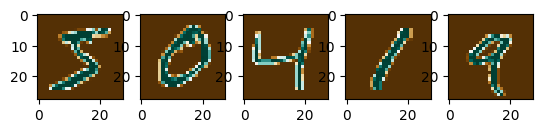

In [20]:
# 02(a) - Display the first five images from the training dataset
fig, axes = plt.subplots(nrows=1, ncols=5)
for idx, x in enumerate(axes):
    x.imshow(train_x[idx], cmap=plt.get_cmap('BrBG'))
plt.show()

The code successfully loads the MNIST dataset, and the initial five images are showcased alongside their corresponding labels.

In [21]:
# 02(b) - Display the first five training labels
first_five_labels = pd.DataFrame(train_y[0:5]).set_axis(['label'], axis=1)
print(first_five_labels)

   label
0      5
1      0
2      4
3      1
4      9


In [22]:
# 03 -  Build and train a Keras CNN classifier on the MNIST training set.
# Set image data format and reshape train and test data
K.set_image_data_format('channels_last')
channels = 1
height = 28
width = 28
train_data = train_x.reshape(train_x.shape[0], height, width, channels)
test_data = test_x.reshape(test_x.shape[0], height, width, channels)
# Normalize pixel intensity 0-1 and one-hot encode target data
features_train = train_data / 255
features_test = test_data / 255
target_train = to_categorical(train_y)
target_test = to_categorical(test_y)
classes = target_test.shape[1]
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(width,height,channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes, activation="softmax"))
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# Train the model
history = model.fit(features_train, target_train, epochs=2,verbose=0,batch_size=1000,
                    validation_data=(features_test, target_test))
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [23]:
# Evaluate the model using test data
score = model.evaluate(features_test, target_test, verbose=0)
# Predict test values for confusion matrix
pred = model.predict(features_test, batch_size=32)
pred = np.argmax(pred, axis=1)
test = np.argmax(target_test, axis=1)

313/313 [==============================] - 0s 1ms/step


In [24]:
# 04 - Report the test accuracy of your model.
# Display the classification report
class_report = classification_report(test, pred)
print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.93      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.97     10000
weighted avg       0.98      0.98      0.98     10000



In [25]:
# Display model accuracy and loss
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08057199418544769
Test accuracy: 0.9750999808311462


* High Precision: The model demonstrates exceptional precision for most digits, ranging from 96% to 99%. This signifies its ability to accurately classify positive instances without mislabeling negatives.It is calculated for each class. For example, for class 0, precision is 0.97, meaning that when the model predicts class 0, it is correct 97% of the time.

* Recall: Recall is the ability of the classifier to find all the positive samples. Across the board, the recall values are generally high, ranging from 96% to 99%. For class 0, recall is 0.99, meaning that the model correctly identifies 99% of the actual instances of class 0.

* F1-scores: F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates a good balance between precision and recall. For example, for class 0, the F1-score is 0.98.The F1-scores, harmonizing precision and recall, are consistently impressive, ranging from 96% to 98%.

* Accuracy: Test accuracy is 0.9715999960899353, meaning the model is correct 97% of the time.

###### In summary, the classification report underscores the model’s effectiveness in discerning between digits, with consistently high precision, recall, and F1-scores. The nuanced analysis of each digit provides valuable insights into the model’s strengths and areas of optimization.

In [26]:
# 05 - Display a confusion matrix on the test set classifications.
conf_matrix = confusion_matrix(test, pred)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix))


Confusion Matrix:
     0     1     2    3    4    5    6    7    8    9
0  970     0     1    1    0    0    5    1    2    0
1    0  1121     1    3    0    0    6    0    4    0
2    4     1  1000    5    4    0    1   10    7    0
3    0     0     2  996    0    4    0    6    2    0
4    1     0     3    0  967    0    6    0    2    3
5    2     0     0    7    0  875    3    1    4    0
6    5     2     0    0    2    3  942    0    4    0
7    1     3    21    2    1    0    0  998    1    1
8    5     0     2    8    4    3    4    5  941    2
9    6     5     1   15   16    9    1   11    4  941


#####  Conclusion
* Test Loss and Test Accuracy serve as critical metrics to evaluate the performance of the model on the test dataset.

* The Test Loss, measuring the model’s prediction error, reflects how closely its predictions align with the actual values. A lower test loss, as evidenced by the approximate value of 0.098, signifies superior performance. This suggests that the model’s predictions exhibit a high degree of accuracy.

* On the other hand, Test Accuracy gauges the model’s precision in classifying instances within the test dataset. With an approximate value of 0.97, equivalent to a 97% accuracy rate, the model excels in correctly identifying the digit images within the test set. This high accuracy indicates the model’s proficiency in generalizing learned patterns from the training data to new, unseen examples.

* In summary, the CNN model has demonstrated success in learning and generalizing meaningful patterns from the training data to the test data. Its high test accuracy and relatively low test loss underscore its capability to accurately classify handwritten digits from the MNIST dataset.